In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

import statsmodels.formula.api as smf

from scipy import stats
from sklearn import model_selection, metrics

# This is the new Covid Dataset
This is the new, merged data including Rate of Covid Cases per 100 000 people (Rate), total neighbourhood Case Counts (Case_Count), and all of the neighbhourhood indicators. 

### Variables are Percentage of people who:
    Low_Edu: Have a Low Education Level (Do not have any certificates or diplomas)
    Low_Inc: Live in low income (after-tax Low Income Measure (LIM))
    MultiGen_House: Live in Multigenerational Housing (3 or more)
    Crowded_House: Live in Crowded Housing
    Immigrants: Are Immigrants
    Vis_Minorities: Identify as racialized (visible minority)


In [88]:
cov_data = pd.read_csv('project/covid_dataframe.csv')
cov_data.head(141)

,NeighbourhoodID,Neighbourhood_Name,Rate,Case_Count,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities
0,1.0,West Humber-Clairville,12250.840540,4081,21,16,20,17,58,82
1,2.0,Mount Olive-Silverstone-Jamestown,12283.789520,4048,31,28,15,31,65,87
2,3.0,Thistletown-Beaumond Heights,11949.806950,1238,25,18,15,16,54,64
3,4.0,Rexdale-Kipling,8148.922025,858,22,19,10,14,48,52
4,5.0,Elms-Old Rexdale,10279.187820,972,24,23,13,18,50,67
...,...,...,...,...,...,...,...,...,...,...
135,136.0,West Hill,6929.030374,1898,22,25,11,12,50,63
136,137.0,Woburn,8632.326821,4617,20,27,14,19,57,76
137,138.0,Eglinton East,8210.396909,1870,22,26,11,23,58,78
138,139.0,Scarborough Village,11055.967470,1849,23,32,8,22,55,73


In [89]:
cov_data = pd.DataFrame(cov_data)
cov_data

,NeighbourhoodID,Neighbourhood_Name,Rate,Case_Count,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities
0,1.0,West Humber-Clairville,12250.840540,4081,21,16,20,17,58,82
1,2.0,Mount Olive-Silverstone-Jamestown,12283.789520,4048,31,28,15,31,65,87
2,3.0,Thistletown-Beaumond Heights,11949.806950,1238,25,18,15,16,54,64
3,4.0,Rexdale-Kipling,8148.922025,858,22,19,10,14,48,52
4,5.0,Elms-Old Rexdale,10279.187820,972,24,23,13,18,50,67
...,...,...,...,...,...,...,...,...,...,...
135,136.0,West Hill,6929.030374,1898,22,25,11,12,50,63
136,137.0,Woburn,8632.326821,4617,20,27,14,19,57,76
137,138.0,Eglinton East,8210.396909,1870,22,26,11,23,58,78
138,139.0,Scarborough Village,11055.967470,1849,23,32,8,22,55,73


# Exploring the Data
Here is a correlation table to look at the correlations among various neighbourhood indicators and Rate of Covid Cases/100 000 people and Total Case Counts.

Observation: Rate (of Covid Cases per 100 000 people) and total Case_Count (unweighted for neighbourhood population) is highly correlated (.703), as would be expected. Case_count is not really a good variable to use because it does not take into consideration population differences in the neighbourhoods. Therefore, Rate will be used instead at the main dependent variable of interest. All of the neighbourhood indicators have a positive correlation with Rate, which are between .393 (Low Income) and .735 (Low Education). All of these will be used in a regression equation in attempts to predict Rate and to determine the best model for future ues.

## Correlation Table

In [4]:
cov_data.corr()

,NeighbourhoodID,Rate,Case_Count,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities
NeighbourhoodID,1.000000,-0.155347,-0.022952,-0.020187,0.050554,0.102176,-0.074576,-0.010474,0.149311
Rate,-0.155347,1.000000,0.703025,0.734578,0.393256,0.609738,0.739193,0.630389,0.561276
Case_Count,-0.022952,0.703025,1.000000,0.431865,0.328840,0.544093,0.595128,0.576943,0.598028
Low_Edu,-0.020187,0.734578,0.431865,1.000000,0.308348,0.681588,0.568971,0.527969,0.468808
Low_Inc,0.050554,0.393256,0.328840,0.308348,1.000000,0.115419,0.748991,0.567642,0.664556
MultiGen_House,0.102176,0.609738,0.544093,0.681588,0.115419,1.000000,0.407096,0.710849,0.711524
Crowded_House,-0.074576,0.739193,0.595128,0.568971,0.748991,0.407096,1.000000,0.726094,0.719893
Immigrants,-0.010474,0.630389,0.576943,0.527969,0.567642,0.710849,0.726094,1.000000,0.886318
Vis_Minorities,0.149311,0.561276,0.598028,0.468808,0.664556,0.711524,0.719893,0.886318,1.000000


## Correlation Scatter Plots

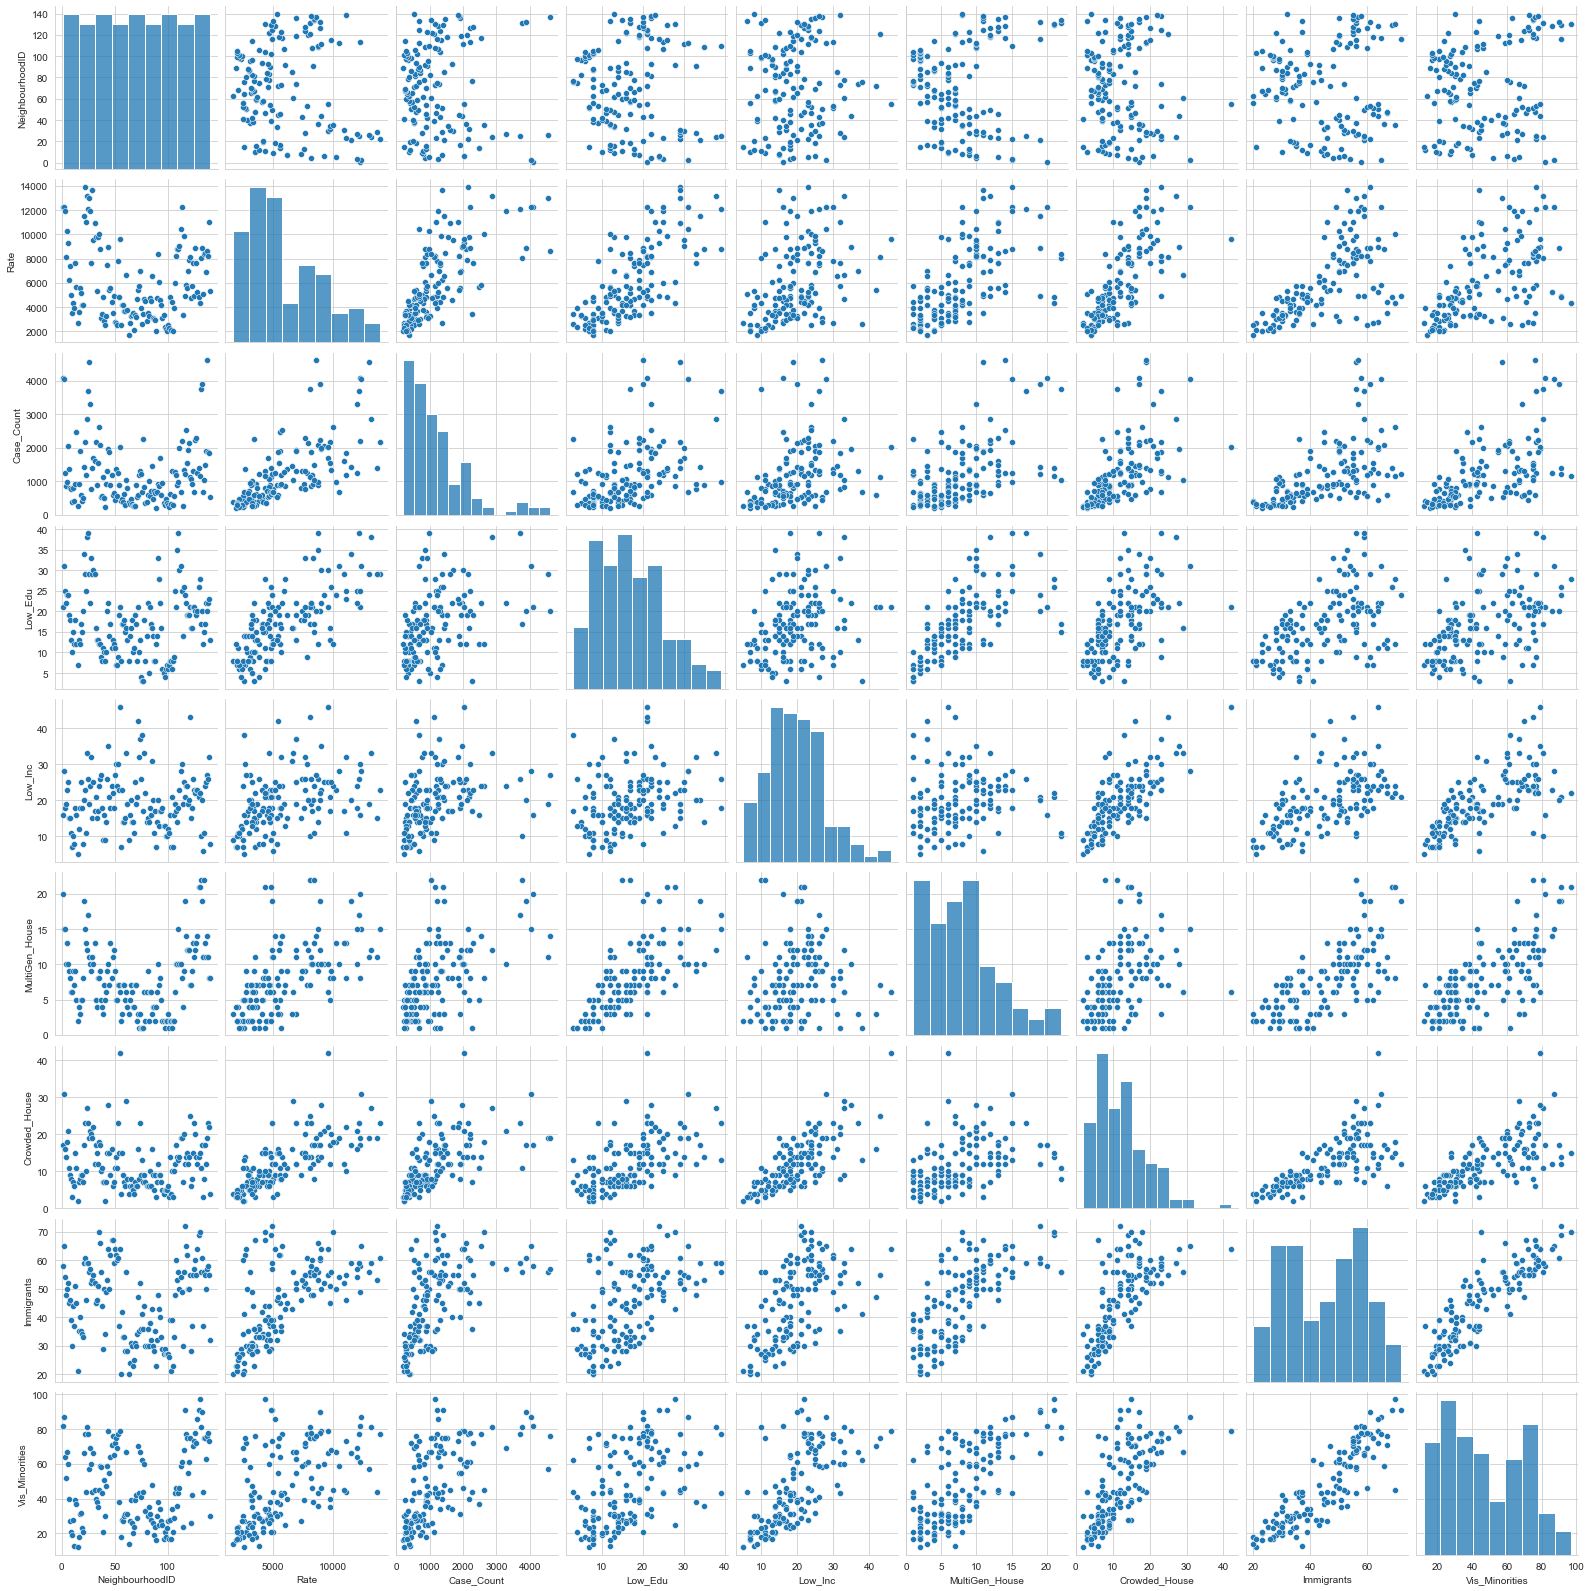

In [5]:
sns.pairplot(data=cov_data)

# Regression Models
A regression model (ordinary least squares) was performed with Rate as the dependent variable (y) and the different neighbourhood indicators as the 6 independent variables (x1, x2, x3, x4, x5, x6). 

**Hypothesis**: The neighbourhood vulnerability indicators (education, income, muligeneratioal and crowded housing, immigrants, and visible minorities) predict rate of covid cases in the City of Toronto. The null hypothesis is that there is no predictive capacity.

In [6]:
model = smf.ols("Rate ~ Low_Edu + Low_Inc + Immigrants + Crowded_House + MultiGen_House + Vis_Minorities", data=cov_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     61.84
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           4.23e-36
Time:                        13:05:17   Log-Likelihood:                -1229.1
No. Observations:                 140   AIC:                             2472.
Df Residuals:                     133   BIC:                             2493.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        827.8339    641.439      1.291      0.199    -440.908    2096.576
Low_Edu           93.1060     33.048      2.817      0.006      27.739     158.473
Low_Inc          -29.9492     41.529     -0.721      0.472    -112.093      52.194
Immigrants        18.6610     23.995      0.778      0.438     -28.800      66.122
Crowded_House    305.0908     40.477      7.537      0.000     225.030     385.152
MultiGen_House   205.7833     86.290      2.385      0.019      35.105     376.461
Vis_Minorities   -41.3143     21.992     -1.879      0.062     -84.814       2.186
==============================================================================
Omnibus:                        2.925   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.974
Skew:                           0.075   Prob(JB):                        0.226
Kurtosis:                       3.698   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Null Hypothesis Rejected
There is evidence that the hypothesis is supported and that we can reject the null hypothesis. The R-square value was high with .736 and the F value (6, 133) was 61.84, p <.001. 


**Conclusion: The neighbourhood vulnerability indicators (education, income, muligeneratioal and crowded housing, immigrants, and visible minorities) predict rate of covid cases in the City of Toronto.** 

## Additional Models Explored
Upon investigation of the coefficients and t value in the the full model, it was clear that the model included at least 2 variables (Low_Inc, Immigrants) that failed to offer significant unique contribution to the model. Therefore, the model was explored removing those variables to determine a better model of predicting Rate of covid cases.

### Rate with Low Education, Crowded Housing, MultiGenerational Housing, and Visible Minorities

This is considered the best model because the R-square = .734 but it is more efficient requiring fewer variables. The F value is is also higher in this model.

In [78]:
model2 = smf.ols("Rate ~ Low_Edu + Crowded_House + MultiGen_House + Vis_Minorities", data=cov_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     93.06
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           7.94e-38
Time:                        21:02:02   Log-Likelihood:                -1229.7
No. Observations:                 140   AIC:                             2469.
Df Residuals:                     135   BIC:                             2484.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1011.7370    386.098      2.620      0.010     248.154    1775.320
Low_Edu           81.1859     29.476      2.754      0.007      22.890     139.481
Crowded_House    308.2465     37.396      8.243      0.000     234.288     382.205
MultiGen_House   263.5310     57.338      4.596      0.000     150.133     376.929
Vis_Minorities   -46.0811     13.493     -3.415      0.001     -72.766     -19.396
==============================================================================
Omnibus:                        3.187   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                3.404
Skew:                           0.071   Prob(JB):                        0.182
Kurtosis:                       3.750   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rate predicted by Low Education, Crowded Housing, Multigenerational Housing

This model was explored because previously, the Immigrants coefficient was not statistically signicant suggesting that immigrants level is not sigificantly contributing to the prediction power of the model. Therefore it was removed to compare the F statistic and the R square with the previous model. The new R-square = .711. As a result it was determined that both model would suffice in predicting Rate of covid cases. But if the Immigrant data is available, it is helpful to have in the model, as it does support a higher R square value. 

In [85]:
model3 = smf.ols("Rate ~ Low_Edu + Crowded_House + MultiGen_House", data=cov_data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.80e-36
Time:                        21:23:54   Log-Likelihood:                -1235.5
No. Observations:                 140   AIC:                             2479.
Df Residuals:                     136   BIC:                             2491.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        337.3537    344.545      0.979      0.329    -344.005    1018.712
Low_Edu          130.0013     26.771      4.856      0.000      77.061     182.942
Crowded_House    211.1118     25.215      8.373      0.000     161.248     260.976
MultiGen_House   116.5091     39.331      2.962      0.004      38.729     194.289
==============================================================================
Omnibus:                        4.589   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                5.458
Skew:                           0.162   Prob(JB):                       0.0653
Kurtosis:                       3.911   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rate predicted by Visible Minorities

Becasue it was observed that some variables did not have a unique contribution in the overall model, it was of interest to determine if these factors individually could still predict Rate of covid cases. Indeed, Visible Minorities can significantly predict Rate of covid cases.

R-square = .315, p < .001

**Conclusion:** Visible minorities is a significant predictor but not as good as the model with education, multigenerational housing, and crowded housing. If that was the only data available it could be used to predict with some degree of certainty rate of covid cases in a community.

In [81]:
model_vis_min = smf.ols("Rate ~ Vis_Minorities", data=cov_data).fit()
model_vis_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     63.47
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           5.46e-13
Time:                        21:20:03   Log-Likelihood:                -1295.9
No. Observations:                 140   AIC:                             2596.
Df Residuals:                     138   BIC:                             2602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2315.7798    508.637      4.553      0.000    1310.050    3321.510
Vis_Minorities    77.7764      9.763      7.967      0.000      58.473      97.080
==============================================================================
Omnibus:                        5.321   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.828
Skew:                           0.428   Prob(JB):                       0.0895
Kurtosis:                       3.307   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rate predicted by Low Income

R-square = .155, p < .001

Low Income is a significant predictor. Just not as good as the model with education, multigenerational housing, and crowded housing

In [82]:
model_low_inc = smf.ols("Rate ~ Low_Inc", data=cov_data).fit()
model_low_inc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     25.25
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.54e-06
Time:                        21:20:32   Log-Likelihood:                -1310.6
No. Observations:                 140   AIC:                             2625.
Df Residuals:                     138   BIC:                             2631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2984.6891    643.530      4.638      0.000    1712.235    4257.143
Low_Inc      153.0578     30.462      5.025      0.000      92.825     213.291
==============================================================================
Omnibus:                       13.913   Durbin-Watson:                   0.617
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.462
Skew:                           0.810   Prob(JB):                     0.000439
Kurtosis:                       3.156   Cond. No.                         56.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rate predicted by Immigrants

R-square = .397, p < .001

Immigrants is a significant predictor. Just not as good as the model with education, multigenerational housing, and crowded housing

In [83]:
model_imm = smf.ols("Rate ~ Immigrants", data=cov_data).fit()
model_imm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     91.00
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           7.07e-17
Time:                        21:21:34   Log-Likelihood:                -1286.9
No. Observations:                 140   AIC:                             2578.
Df Residuals:                     138   BIC:                             2584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -417.8451    701.074     -0.596      0.552   -1804.081     968.391
Immigrants   142.7545     14.964      9.540      0.000     113.165     172.344
==============================================================================
Omnibus:                        3.377   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                3.691
Skew:                           0.083   Prob(JB):                        0.158
Kurtosis:                       3.778   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting Rate with Education only

In [156]:
model_edu = smf.ols("Rate ~ Low_Edu", data=cov_data).fit()
model_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     161.7
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           5.23e-25
Time:                        10:26:29   Log-Likelihood:                -1268.1
No. Observations:                 140   AIC:                             2540.
Df Residuals:                     138   BIC:                             2546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1245.6800    412.518      3.020      0.003     430.007    2061.353
Low_Edu      280.8316     22.082     12.718      0.000     237.169     324.494
==============================================================================
Omnibus:                        4.472   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                4.488
Skew:                           0.433   Prob(JB):                        0.106
Kurtosis:                       2.863   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting Case_Count instead of Rate

This model was done just to show that Rate is a better predicted variable than total Case Counts. Not only does it make more sense to use Rate, it also is easier to predict with the data available. 

In [86]:
#Predicting Case_Count instaed of Rate
modelX = smf.ols("Case_Count ~ Low_Edu + Crowded_House + MultiGen_House + Vis_Minorities", data=cov_data).fit()
modelX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Case_Count   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     30.52
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           4.34e-18
Time:                        21:31:07   Log-Likelihood:                -1110.1
No. Observations:                 140   AIC:                             2230.
Df Residuals:                     135   BIC:                             2245.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         43.6729    164.268      0.266      0.791    -281.199     368.545
Low_Edu          -20.3839     12.541     -1.625      0.106     -45.186       4.418
Crowded_House     72.2096     15.911      4.538      0.000      40.743     103.676
MultiGen_House    90.1687     24.395      3.696      0.000      41.923     138.415
Vis_Minorities    -1.7129      5.741     -0.298      0.766     -13.066       9.640
==============================================================================
Omnibus:                       41.374   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.634
Skew:                           1.286   Prob(JB):                     4.19e-19
Kurtosis:                       5.810   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Further Insights: Computing a New Vulnerability Variable
Upon all of this observation, the question arose as to whether a composite variable could be created that represented these indidicator variables better. An vulnerability marker, so to speak. 

In [90]:
cov_data["Vulnerability_Score"] = cov_data["Low_Edu"] + cov_data["Low_Inc"] + cov_data["Immigrants"] + cov_data["Vis_Minorities"] + cov_data["MultiGen_House"] + cov_data["Crowded_House"]
cov_data.head()

,NeighbourhoodID,Neighbourhood_Name,Rate,Case_Count,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities,Vulnerability_Score
0,1.0,West Humber-Clairville,12250.840540,4081,21,16,20,17,58,82,214
1,2.0,Mount Olive-Silverstone-Jamestown,12283.789520,4048,31,28,15,31,65,87,257
2,3.0,Thistletown-Beaumond Heights,11949.806950,1238,25,18,15,16,54,64,192
3,4.0,Rexdale-Kipling,8148.922025,858,22,19,10,14,48,52,165
4,5.0,Elms-Old Rexdale,10279.187820,972,24,23,13,18,50,67,195


In [91]:
cov_data.corr()

,NeighbourhoodID,Rate,Case_Count,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities,Vulnerability_Score
NeighbourhoodID,1.000000,-0.155347,-0.022952,-0.020187,0.050554,0.102176,-0.074576,-0.010474,0.149311,0.062903
Rate,-0.155347,1.000000,0.703025,0.734578,0.393256,0.609738,0.739193,0.630389,0.561276,0.704433
Case_Count,-0.022952,0.703025,1.000000,0.431865,0.328840,0.544093,0.595128,0.576943,0.598028,0.627448
Low_Edu,-0.020187,0.734578,0.431865,1.000000,0.308348,0.681588,0.568971,0.527969,0.468808,0.652858
Low_Inc,0.050554,0.393256,0.328840,0.308348,1.000000,0.115419,0.748991,0.567642,0.664556,0.712491
MultiGen_House,0.102176,0.609738,0.544093,0.681588,0.115419,1.000000,0.407096,0.710849,0.711524,0.731377
Crowded_House,-0.074576,0.739193,0.595128,0.568971,0.748991,0.407096,1.000000,0.726094,0.719893,0.835422
Immigrants,-0.010474,0.630389,0.576943,0.527969,0.567642,0.710849,0.726094,1.000000,0.886318,0.932936
Vis_Minorities,0.149311,0.561276,0.598028,0.468808,0.664556,0.711524,0.719893,0.886318,1.000000,0.955678
Vulnerability_Score,0.062903,0.704433,0.627448,0.652858,0.712491,0.731377,0.835422,0.932936,0.955678,1.000000


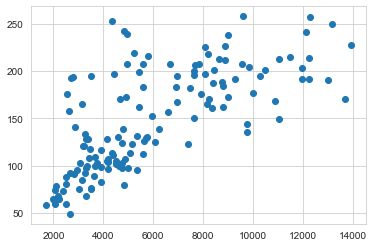

In [159]:
plt.scatter(cov_data['Rate'],cov_data['Vulnerability_Score'])

In [92]:
model_new = smf.ols("Rate ~ Vulnerability_Score", data=cov_data).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.72e-22
Time:                        21:34:46   Log-Likelihood:                -1274.4
No. Observations:                 140   AIC:                             2553.
Df Residuals:                     138   BIC:                             2559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              40.6828    542.412      0.075      0.940   -1031.831    1113.196
Vulnerability_Score    40.0570      3.436     11.659      0.000      33.264      46.850
==============================================================================
Omnibus:                        3.970   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                4.645
Skew:                           0.107   Prob(JB):                       0.0980
Kurtosis:                       3.866   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**New Variable Conclusion:**

Although the Vulnerability variable could be used to sigificantly predict Rate of covid cases (R-square = .496), the model is not as powerful as the model with only education, multigenerational housing, crowded housing, and visible minorities. For efficiency sake, there is not good reason to create a new variable as a result.   

# Conclusions
    
The best and most efficient model for predicting Rate of covid cases is a model that used Education, Multigenerational Housing, Crowded Housing, and Visible Minorities as independent variables. This represents 4 of the original 6 indicator variables. 73.6% of the variability is explained when all of those 4 variables are included in the model. 

However, each of the neighbourhood indicators could be used to predict Rate of covid cases if that was the only data available. They each have significant predictive ability, with income presenting the least amount of power (R-square = .155) and education representing the most R-square =.54). 

# Model Validation

## Can the Model Predict new Rates of Covid?
Here there was an attempt to create a dataset of new data to be used to predict Rate. A dataset was generated but includind dummy data of 5 data points that were randomly generated between the lowest value of the original column data and the highest value. 

In [10]:
#this was used to get the min and max values so that a new dataset could be generated within those ranges
cov_data.describe()

,NeighbourhoodID,Rate,Case_Count,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,5985.715696,1195.971429,16.878571,19.607143,7.864286,12.021429,44.857143,47.185714
std,40.5586,3071.967088,930.467013,8.035414,7.892895,4.924189,6.834601,13.565493,22.168935
min,1.0000,1710.947281,201.000000,3.000000,5.000000,1.000000,2.000000,20.000000,12.000000
25%,35.7500,3469.930054,543.750000,11.000000,14.000000,4.000000,7.000000,33.000000,28.000000
50%,70.5000,4978.181959,907.000000,16.000000,19.000000,7.000000,11.000000,46.000000,43.000000
75%,105.2500,8214.682019,1486.500000,21.250000,24.000000,11.000000,16.000000,56.000000,67.000000
max,140.0000,13920.874880,4617.000000,39.000000,46.000000,22.000000,42.000000,72.000000,97.000000


In [15]:
#I think there is something wrong with this code and it returns an error of "dict not calleable". Not sure why. I have tried to google it and come up with nothing!
#rng = np.random.default_rng(seed=42)
#print(rng)

In [55]:
#dummy_data = ({'Low_Edu': rng.integers(low=3, high=39, size=5),
 #                        'Low_Inc': rng.integers(low=5, high=46, size=5), 
  #                      'MultiGen_House': rng.integers(low=1, high=22, size=5),
   #                     'Crowded_House': rng.integers(low=2, high=42, size=5),
    #                    'Immigrants': rng.integers(low=20, high=72, size=5),
     #                   'Vis_Minorities': rng.integers(low=12, high=97, size=5)})
#dummy_data

{'Low_Edu': array([ 6, 30, 26, 18, 18]),
 'Low_Inc': array([40,  8, 33, 13,  8]),
 'MultiGen_House': array([12, 21, 16, 16, 16]),
 'Crowded_House': array([33, 22,  7, 35, 20]),
 'Immigrants': array([46, 39, 29, 68, 60]),
 'Vis_Minorities': array([66, 46, 81, 58, 49])}

In [11]:
#The data printed above were manually inputed into a dummy dataframe.
dummy_data2 = ({'Low_Edu': [6, 30, 26, 18, 18],
                         'Low_Inc': [40,  8, 33, 13,  8], 
                        'MultiGen_House': [12, 21, 16, 16, 16],
                        'Crowded_House': [33, 22,  7, 35, 20],
                        'Immigrants': [46, 39, 29, 68, 60],
                        'Vis_Minorities': [66, 46, 81, 58, 49]})
dummy_data2

{'Low_Edu': [6, 30, 26, 18, 18],
 'Low_Inc': [40, 8, 33, 13, 8],
 'MultiGen_House': [12, 21, 16, 16, 16],
 'Crowded_House': [33, 22, 7, 35, 20],
 'Immigrants': [46, 39, 29, 68, 60],
 'Vis_Minorities': [66, 46, 81, 58, 49]}

In [23]:
dummy = pd.DataFrame(data=dummy_data2,dtype=int)

In [24]:
dummy

,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities
0,6,40,12,33,46,66
1,30,8,21,22,39,46
2,26,33,16,7,29,81
3,18,13,16,35,68,58
4,18,8,16,20,60,49


In [25]:
#new predicted values added
dummy['Predicted_Rate'] = model.predict(dummy)
dummy

,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities,Predicted_Rate
0,6,40,12,33,46,66,10857.565830
1,30,8,21,22,39,46,13242.191093
2,26,33,16,7,29,81,4883.148559
3,18,13,16,35,68,58,14957.837475
4,18,8,16,20,60,49,10753.760745


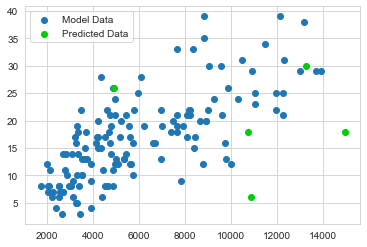

In [164]:
plt.scatter(cov_data['Rate'],cov_data['Low_Edu'],label='Model Data')
plt.scatter(dummy['Predicted_Rate'],dummy['Low_Edu'],color='#00CC00',label='Predicted Data')
plt.legend();

### Observations
The scatterplot with both the original rate of covid data and the predicted rate data show that the predicted data do fit in with the original model data. This further validates the model. That being said, we only generated 5 data points, which offers limited support.

## Predicting Vulnerable and Resilient Neighbourhoods

Using the model, can we predict the Rate of Covid cases for a fictitious neighbourhood that scores high on all vulnerable indicators?  Here the highest and lowest value of each variable (as gathered with the range above) was used to predict a fictitious vulnerable and resillient community. 


**Vulnerable Community:** The predicted rate is 18 452 per 100 000 people.

In [166]:
model2.predict({'Low_Edu': 39,
                        'MultiGen_House': 22,
                        'Crowded_House': 42,
                        'Vis_Minorities': 97})

0    18452.155505
dtype: float64

**Resilient Community:** The predicted rate is 1582 per 100 000 people.

In [167]:
model2.predict({'Low_Edu': 3,
                        'MultiGen_House': 1,
                        'Crowded_House': 2,
                        'Vis_Minorities': 12})

0    1582.345464
dtype: float64

In [175]:
#Vulnerabilty Risk

Dem = model2.predict({'Low_Edu': 39,
                        'MultiGen_House': 22,
                        'Crowded_House': 42,
                        'Vis_Minorities': 97})

Num = model2.predict({'Low_Edu': 3,
                        'MultiGen_House': 1,
                        'Crowded_House': 2,
                        'Vis_Minorities': 12})

print(Dem)
print(Num)

VulRisk = (Dem/Num)
print(VulRisk)

0    18452.155505
dtype: float64
0    1582.345464
dtype: float64
0    11.661269
dtype: float64


In [189]:
print('Vulnerability Risk' + str(VulRisk))

Vulnerability Risk0    11.661269
dtype: float64


**Observation:** A community high on all indicator variables has a 11.6 fold increased vulnerability for Rate of covid cases. 

# Conclusions
Neighbourhoods with Low Education Levels, Multigenerational Housing, and Crowded Housing, and higher Visble minorities  all are at a greater risk for covid in the community. Risk of covid rates can be best predicted by including education levels, multigenerational housing, crowded housing, and visible minorites in the regression model.

# THIS IS THE END OF THE PRESENTATION!
everything below is what I am still working on and not finished by the deadline! Sorry!

## Additional Model Validation

In [97]:
cov_data.head(10)

,NeighbourhoodID,Neighbourhood_Name,Rate,Case_Count,Low_Edu,Low_Inc,MultiGen_House,Crowded_House,Immigrants,Vis_Minorities,Vulnerability_Score
0,1.0,West Humber-Clairville,12250.840540,4081,21,16,20,17,58,82,214
1,2.0,Mount Olive-Silverstone-Jamestown,12283.789520,4048,31,28,15,31,65,87,257
2,3.0,Thistletown-Beaumond Heights,11949.806950,1238,25,18,15,16,54,64,192
3,4.0,Rexdale-Kipling,8148.922025,858,22,19,10,14,48,52,165
4,5.0,Elms-Old Rexdale,10279.187820,972,24,23,13,18,50,67,195
5,6.0,Kingsview Village-The Westway,9263.636364,2038,24,25,10,21,52,60,192
6,7.0,Willowridge-Martingrove-Richview,6228.561112,1380,19,15,9,11,45,40,139
7,8.0,Humber Heights-Westmount,7389.477530,809,18,15,8,9,46,27,123
8,9.0,Edenbridge-Humber Valley,5008.046347,778,13,11,6,8,39,21,98
9,10.0,Princess-Rosethorn,3510.994480,388,10,7,6,3,30,19,75


In [132]:
train_data = cov_data.iloc[0:139:2,]
test_data = cov_data.iloc[1:139:2,]
print(train_data)
print(test_data)

     NeighbourhoodID                Neighbourhood_Name          Rate  \
0                1.0            West Humber-Clairville  12250.840540   
2                3.0      Thistletown-Beaumond Heights  11949.806950   
4                5.0                  Elms-Old Rexdale  10279.187820   
6                7.0  Willowridge-Martingrove-Richview   6228.561112   
8                9.0          Edenbridge-Humber Valley   5008.046347   
..               ...                               ...           ...   
130            131.0                             Rouge   8069.511356   
132            133.0            Centennial Scarborough   5059.122886   
134            135.0                       Morningside   8433.113721   
136            137.0                            Woburn   8632.326821   
138            139.0               Scarborough Village  11055.967470   

     Case_Count  Low_Edu  Low_Inc  MultiGen_House  Crowded_House  Immigrants  \
0          4081       21       16              20      

In [133]:
model_train = smf.ols("Rate ~ Low_Edu + Crowded_House + MultiGen_House + Vis_Minorities", data=train_data).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     38.83
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.41e-16
Time:                        22:17:18   Log-Likelihood:                -621.00
No. Observations:                  70   AIC:                             1252.
Df Residuals:                      65   BIC:                             1263.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        787.8552    657.355      1.199      0.235    -524.973    2100.684
Low_Edu          126.3395     47.572      2.656      0.010      31.332     221.347
Crowded_House    217.0824     60.094      3.612      0.001      97.066     337.099
MultiGen_House   202.4037     94.799      2.135      0.037      13.078     391.729
Vis_Minorities   -19.8891     24.442     -0.814      0.419     -68.702      28.924
==============================================================================
Omnibus:                        0.594   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.156
Skew:                           0.021   Prob(JB):                        0.925
Kurtosis:                       3.228   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

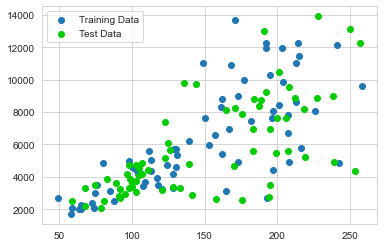

In [147]:
plt.scatter(train_data['Vulnerability_Score'],train_data['Rate'],label='Training Data')
plt.scatter(test_data['Vulnerability_Score'],test_data['Rate'],color='#00CC00',label='Test Data')
plt.legend();

In [149]:
#Vulnerability Score
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(train_data['Vulnerability_Score'],train_data['Rate'])

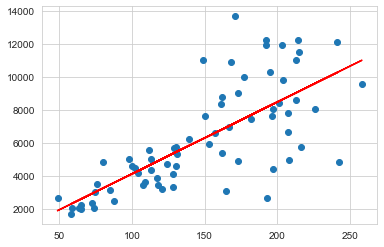

In [153]:
train_regr = intercept + slope * train_data['Vulnerability_Score']

plt.scatter(train_data['Vulnerability_Score'],train_data['Rate'])
plt.plot(train_data['Vulnerability_Score'],train_regr, color ='red');

In [154]:
#Low_Edu
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(train_data['Low_Edu'],train_data['Rate'])

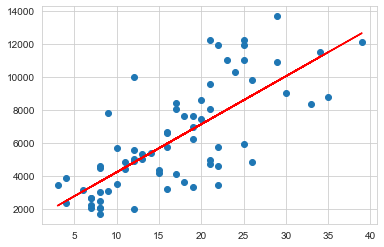

In [155]:
train_regr_edu = intercept + slope * train_data['Low_Edu']

plt.scatter(train_data['Low_Edu'],train_data['Rate'])
plt.plot(train_data['Low_Edu'],train_regr_edu, color ='red');